In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def gravityForce(G, M, m, x, y):

  Fx = -G * M * m * x / (np.sqrt(x**2 + y**2))**3
  Fy = -G * M * m * y / (np.sqrt(x**2 + y**2))**3

  return Fx, Fy

def gravityPotential(G, M, m, x, y):
  return -G * M * m / np.sqrt(x**2 + y**2)

In [ ]:
def Euler(G, M, m, x0, y0, p0x, p0y, Nsteps, dt):
  x, y = x0, y0
  px, py = p0x, p0y

  Tmax = dt * Nsteps

  X = [x0]
  Y = [y0]

  Px = [p0x]
  Py = [p0y]

  T = [0]
  Fx, Fy = gravityForce(G, M, m, x, y)

  for t in np.linspace(dt, Tmax, Nsteps):
    xn = x + dt * px / m +  dt**2 * Fx / (2 * m)
    yn = y + dt * py / m + dt**2 * Fy / (2 * m)

    pxn = px + dt * Fx
    pyn = py + dt * Fy

    x = xn
    y = yn
    X += [x]
    Y += [y]
    Fx, Fy = gravityForce(G, M, m, x, y)

    px = pxn
    py = pyn
    Px += [px]
    Py += [py]

    T += [t + dt]

  return X, Y, Px, Py, T

In [ ]:
G = 0.01
M = 500  #M is motionless rests in the center of coordinate system
m = 0.1
Nsteps = 15130 * 2 + 190 + 100
dt = 0.001
x0 = 2
y0 = 0
p0x = 0
p0y = 0.1

In [ ]:
XE, YE, PxE, PyE, TE = Euler(G, M, m, x0, y0, p0x, p0y, Nsteps, dt)
YexactE = np.sqrt(1 -(1/1.25**2) * np.array((XE) - 0.75 * np.ones(np.shape(XE)))**2)

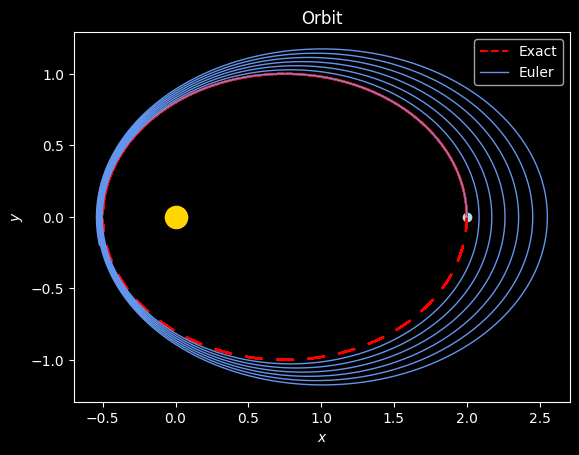

In [ ]:
plt.style.use('dark_background')
plt.scatter(0,0, linewidths=11, color='gold', marker='o')
plt.scatter(x0, y0, color='powderblue')

plt.plot(XE, YexactE, 'r--', label='Exact')
plt.plot(XE, -YexactE,'r', linestyle=(0, (5, 10)))
plt.plot(XE, YE, color = 'cornflowerblue', linewidth=1, label='Euler')

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Orbit')
plt.legend(loc=1)
plt.show()

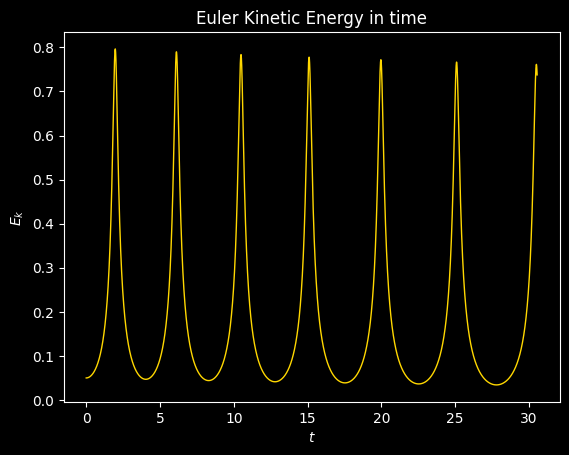

In [ ]:
plt.plot(TE, np.array(PxE)**2/(2 * m) + np.array(PyE)**2/(2 *m), color = 'gold', linewidth=1)
plt.xlabel(r'$t$')
plt.ylabel(r'$E_k$')
plt.title("Euler Kinetic Energy in time")
plt.show()

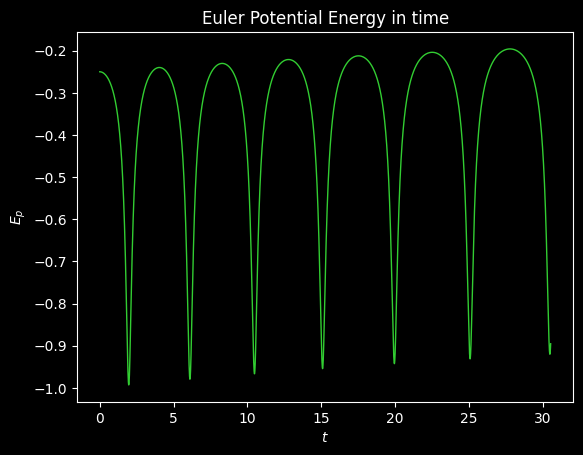

In [ ]:
plt.plot(TE, gravityPotential(G, M, m, np.array(XE), np.array(YE)), color = 'limegreen', linewidth=1)
plt.xlabel(r'$t$')
plt.ylabel(r'$E_p$')
plt.title("Euler Potential Energy in time")
plt.show()

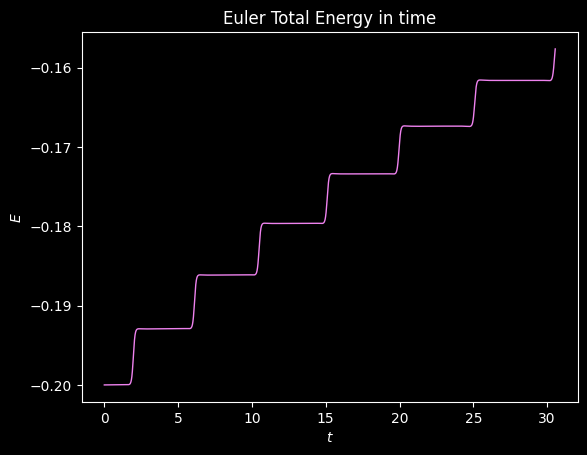

In [ ]:
plt.plot(TE, (np.array(PxE)**2/(2 * m) + np.array(PyE)**2/(2 *m) + gravityPotential(G, M, m, np.array(XE), np.array(YE))), color = 'violet', linewidth=1)
plt.xlabel(r'$t$')
plt.ylabel(r'$E$')
plt.title("Euler Total Energy in time")
plt.show()
#when the planet is the closest to the Sun, the algorithm loses accuracy (here E = 2) is corresponding to the peak

In [ ]:
def Verlet(G, M, m, x0, y0, p0x, p0y, Nsteps, dt):
  v0x = p0x / m
  v0y = p0y / m
  x, y = x0, y0
  vx, vy = v0x, v0y
  Fx, Fy = gravityForce(G, M, m, x, y)

  #previous step interpolation
  xp = x - vx * dt
  yp = y - vy * dt

  Tmax = dt * Nsteps

  X = [x0]
  Y = [y0]

  Vx = []
  Vy = []

  T = []

  for t in np.linspace(dt, Tmax, Nsteps):

    Fx, Fy = gravityForce(G, M, m, x, y)

    xn = 2 * x - xp +  dt**2 * Fx / m
    yn = 2 * y - yp +  dt**2 * Fy / m

    vx = (xn - xp) / (2 * dt)
    vy = (yn - yp) / (2 * dt)

    xp = x
    yp = y

    x = xn
    y = yn
    X += [x]
    Y += [y]

    Vx += [vx]
    Vy += [vy]

    T += [t + dt]

  Px = np.array(Vx) * m
  Py = np.array(Vy) * m
  Px = list(Px)
  Py = list(Py)
  return X[:-1], Y[:-1], Px, Py, T

In [ ]:
XV, YV, PxV, PyV, TV = Verlet(G, M, m, x0, y0, p0x, p0y, Nsteps, dt)
YexactV = np.sqrt(1 -(1/1.25**2) * np.array((XV) - 0.75 * np.ones(np.shape(XV)))**2)

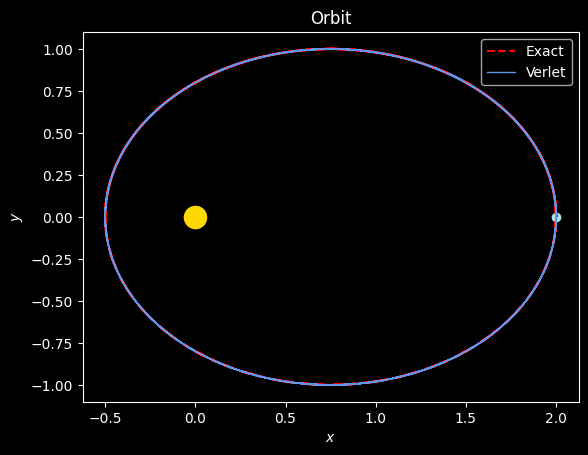

In [ ]:
plt.scatter(0,0, linewidths=11, color='gold', marker='o')

plt.plot(XV, YexactV, 'r--', label='Exact')
plt.plot(XV, -YexactV,'r', linestyle=(0, (5, 10)))

plt.plot(XV, YV, color = 'cornflowerblue', linewidth=1, label='Verlet')
plt.scatter(x0, y0, color='powderblue')

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Orbit')
plt.legend(loc=1)
plt.show()

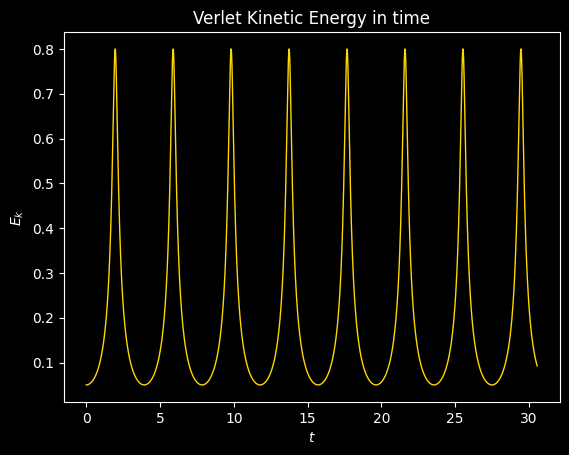

In [ ]:
plt.plot(TV, np.array(PxV)**2/(2 * m) + np.array(PyV)**2/(2 *m), color = 'gold', linewidth=1)
plt.xlabel(r'$t$')
plt.ylabel(r'$E_k$')
plt.title("Verlet Kinetic Energy in time")
plt.show()

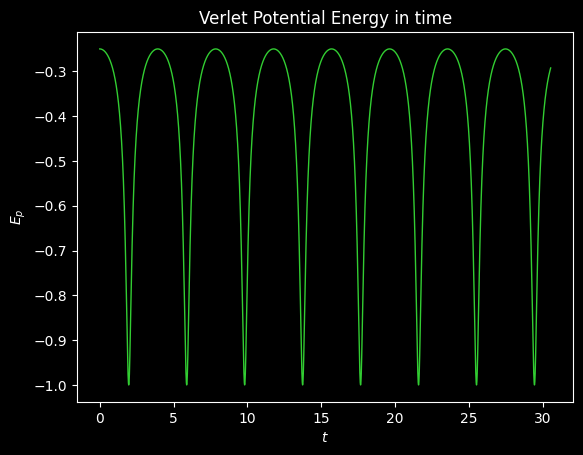

In [ ]:
plt.plot(TV, gravityPotential(G, M, m, np.array(XV), np.array(YV)), color = 'limegreen', linewidth=1)
plt.xlabel(r'$t$')
plt.ylabel(r'$E_p$')
plt.title("Verlet Potential Energy in time")
plt.show()

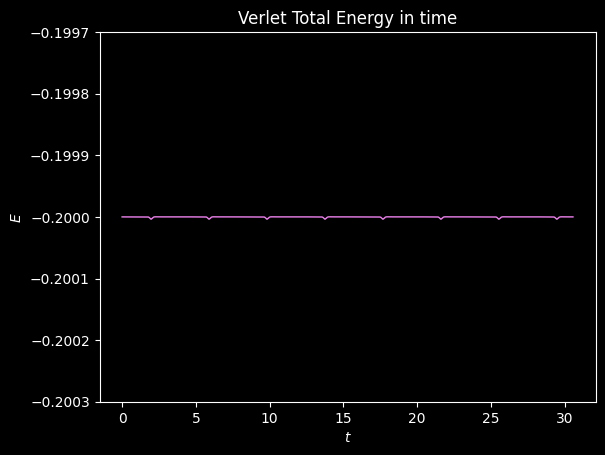

In [ ]:
plt.plot(TV, (np.array(PxV)**2/(2 * m) + np.array(PyV)**2/(2 *m) + gravityPotential(G, M, m, np.array(XV), np.array(YV))), color = 'violet', linewidth=1)
plt.xlabel(r'$t$')
plt.ylabel(r'$E$')
plt.ylim(-0.2003, -0.1997)
plt.title("Verlet Total Energy in time")
plt.show()

In [ ]:
def Leapfrog(G, M, m, x0, y0, p0x, p0y, Nsteps, dt):
  x, y = x0, y0
  px, py = p0x, p0y
  Fx, Fy = gravityForce(G, M, m, x, y)

  #previous step interpolation
  xp = x - px * dt / (2 * m)
  yp =  y - py * dt / (2 * m)

  px2p = p0x - dt * Fx / 2
  py2p = p0y - dt * Fy / 2

  Tmax = dt * Nsteps

  X = [x0]
  Y = [y0]

  Px = [p0x]
  Py = [p0y]

  T = [0]

  for t in np.linspace(dt, Tmax, Nsteps):

    px2n = px2p + dt * Fx
    py2n = py2p + dt * Fy

    xn = x + dt * px2n /  m
    yn = y + dt * py2n /  m

    x = xn
    y = yn

    X += [x]
    Y += [y]

    Fx, Fy = gravityForce(G, M, m, x, y)

    px2p = px2n
    py2p = py2n

    px2n = px2p + dt * Fx
    py2n = py2p + dt * Fy

    pxn = 0.5 * (px2p + px2n)
    pyn =  0.5 * (py2p + py2n)

    px = pxn
    py = pyn
    Px += [px]
    Py += [py]

    T += [t + dt]

  return X, Y, Px, Py, T

In [ ]:
XL, YL, PxL, PyL, TL = Leapfrog(G, M, m, x0, y0, p0x, p0y, Nsteps, dt)
YexactL = np.sqrt(1 -(1/1.25**2) * np.array((XL) - 0.75 * np.ones(np.shape(XL)))**2)

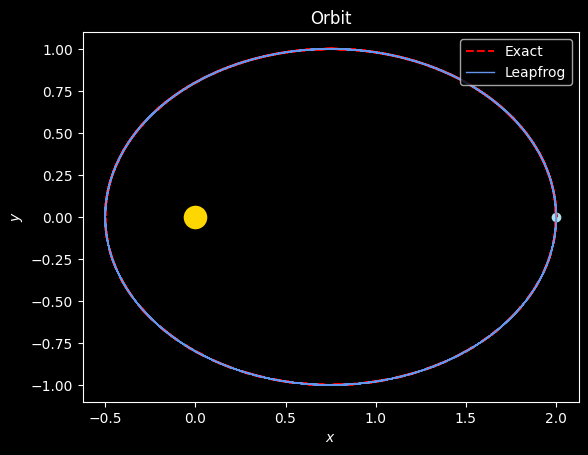

In [ ]:
plt.scatter(0,0, linewidths=11, color='gold', marker='o')

plt.plot(XL, YexactL, 'r--', label='Exact')
plt.plot(XL, -YexactL,'r', linestyle=(0, (5, 10)))

plt.plot(XL, YL, color = 'cornflowerblue', linewidth=1, label='Leapfrog')
plt.scatter(x0, y0, color='powderblue')

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Orbit')
plt.legend(loc=1)
plt.show()

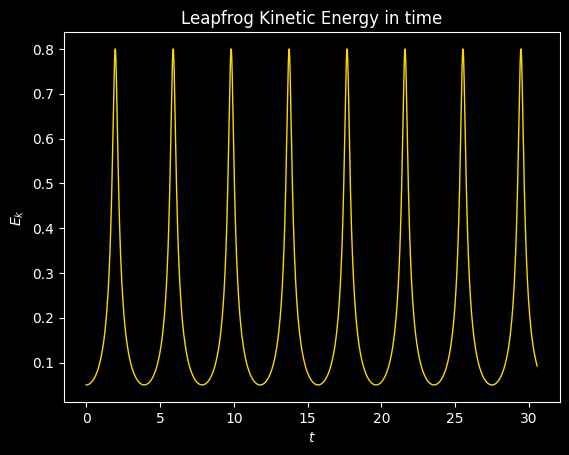

In [ ]:
plt.plot(TL, np.array(PxL)**2/(2 * m) + np.array(PyL)**2/(2 *m), color = 'gold', linewidth=1)
plt.xlabel(r'$t$')
plt.ylabel(r'$E_k$')
plt.title("Leapfrog Kinetic Energy in time")
plt.show()

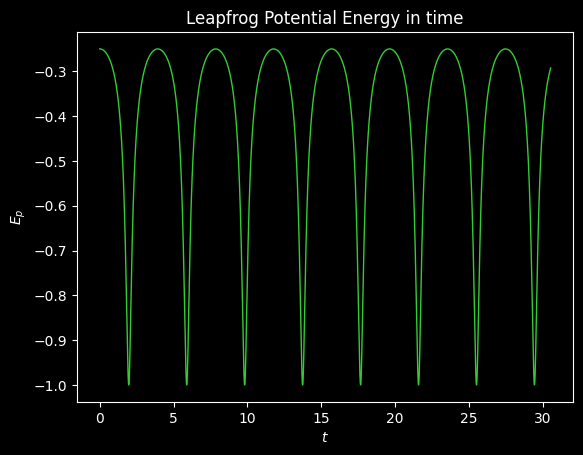

In [ ]:
plt.plot(TL, gravityPotential(G, M, m, np.array(XL), np.array(YL)), color = 'limegreen', linewidth=1)
plt.xlabel(r'$t$')
plt.ylabel(r'$E_p$')
plt.title("Leapfrog Potential Energy in time")
plt.show()

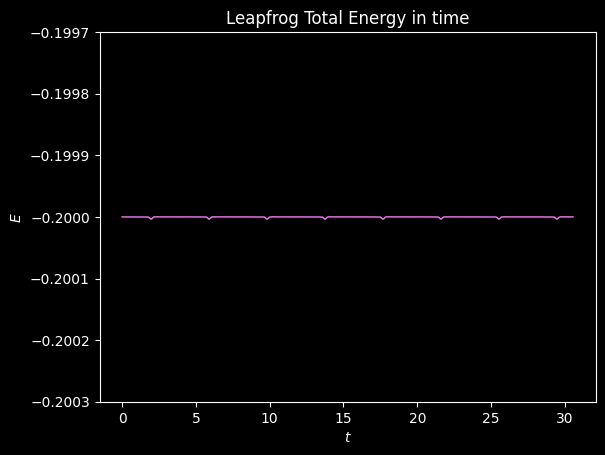

In [ ]:
plt.style.use('dark_background')
plt.plot(TL, (np.array(PxL)**2/(2 * m) + np.array(PyL)**2/(2 *m) + gravityPotential(G, M, m, np.array(XL), np.array(YL))), color = 'violet', linewidth=1)
plt.xlabel(r'$t$')
plt.ylabel(r'$E$')
plt.title("Leapfrog Total Energy in time")
plt.ylim(-0.2003, -0.1997)
plt.show()
#1e-6

In [ ]:
def gravityForceVectorized(G, M, m, R, r):
  return -G * M * m * (r - R) / (np.linalg.norm(R - r))**3

In [ ]:
def LeapfrogThreeBody(G, m1, r01, p01, m2, r02, p02, m3, r03, p03, Nsteps, dt):
  r1 = r01
  r2 = r02
  r3 = r03
  p1 = p01
  p2 = p02
  p3 = p03

  F1 = gravityForceVectorized(G, m2, m1, r2, r1) + gravityForceVectorized(G, m3, m1, r3, r1)
  F2 = gravityForceVectorized(G, m1, m2, r1, r2) + gravityForceVectorized(G, m3, m2, r3, r2)
  F3 = gravityForceVectorized(G, m1, m3, r1, r3) + gravityForceVectorized(G, m2, m3, r2, r3)

  #previous step interpolation
  rp1 =  r1 - p1 * dt / (2 * m1)
  pHalfp1 = p01 - dt * F1 / 2
  rp2 =  r2 - p2 * dt / (2 * m2)
  pHalfp2 = p02 - dt * F2 / 2
  rp3 =  r3 - p3 * dt / (2 * m3)
  pHalfp3 = p03 - dt * F3 / 2

  R1 = [r01]
  P1 = [p01]
  R2 = [r02]
  P2 = [p02]
  R3 = [r03]
  P3 = [p03]

  Tmax = dt * Nsteps
  T = [0]

  for t in np.linspace(dt, Tmax, Nsteps):

    pHalfn1 = pHalfp1 + dt * F1
    rn1 = r1 + dt * pHalfn1 /  m1
    pHalfn2 = pHalfp2 + dt * F2
    rn2 = r2 + dt * pHalfn2 /  m2
    pHalfn3 = pHalfp3 + dt * F3
    rn3 = r3 + dt * pHalfn3 /  m3

    r1 = rn1
    R1 += [r1]
    r2 = rn2
    R2 += [r2]
    r3 = rn3
    R3 += [r3]

    F1 = gravityForceVectorized(G, m2, m1, r2, r1) + gravityForceVectorized(G, m3, m1, r3, r1)
    F2 = gravityForceVectorized(G, m1, m2, r1, r2) + gravityForceVectorized(G, m3, m2, r3, r2)
    F3 = gravityForceVectorized(G, m1, m3, r1, r3) + gravityForceVectorized(G, m2, m3, r2, r3)

    pHalfp1 = pHalfn1
    pHalfp2 = pHalfn2
    pHalfp3 = pHalfn3

    pHalfn1 = pHalfp1 + dt * F1
    pHalfn2 = pHalfp2 + dt * F2
    pHalfn3 = pHalfp3 + dt * F3

    pn1 = 0.5 * (pHalfp1 + pHalfn1)
    pn2 = 0.5 * (pHalfp2 + pHalfn2)
    pn3 = 0.5 * (pHalfp3 + pHalfn3)

    p1 = pn1
    P1 += [p1]
    p2 = pn2
    P2 += [p2]
    p3 = pn3
    P3 += [p3]

    T += [t + dt]

  return R1, P1, R2, P2, R3, P3, T

[]

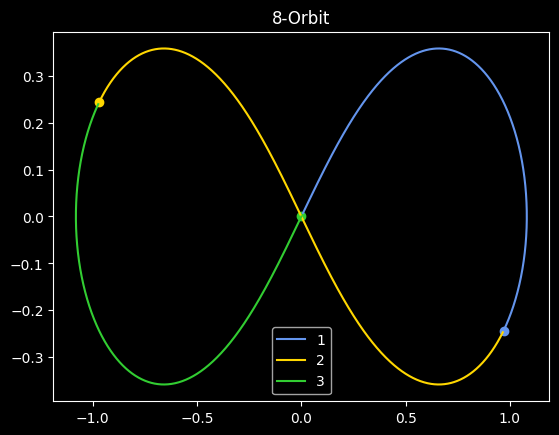

In [ ]:
G = 1
m1 = 1
m2 = 1
m3 = 1
dt = 0.001
Nsteps = 2100

r01 = np.array([0.97000436,-0.24308753])
p01 = np.array([0.93240737, 0.86473146]) / (2)

r02 = np.array([-0.97000436,0.24308753])
p02 = np.array([0.93240737, 0.86473146]) / (2)

r03 = np.array([0, 0])
p03 = np.array([-0.93240737, -0.86473146])

R1, P1, R2, P2, R3, P3, T = LeapfrogThreeBody(G, m1, r01, p01, m2, r02, p02, m3, r03, p03, Nsteps, dt)

plt.style.use('dark_background')
plt.scatter(r01[0], r01[1], color = 'cornflowerblue')
plt.scatter(r02[0], r02[1], color = 'gold')
plt.scatter(r03[0], r03[1], color = 'limegreen')
plt.plot(np.array(R1)[:,0], np.array(R1)[:,1], color = 'cornflowerblue', label='1')
plt.plot(np.array(R2)[:,0], np.array(R2)[:,1], color = 'gold', label='2')
plt.plot(np.array(R3)[:,0], np.array(R3)[:,1], color = 'limegreen', label='3')
plt.title("8-Orbit")
plt.legend()
plt.plot()